Notebook to compare v201702 bathymetry and v201803 bathymetry (with and without Charnock waves) to ferry data

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import netCDF4 as nc
import numpy as np
import pandas as pd

from salishsea_tools import viz_tools

%matplotlib inline

# Get the Matched Data Points

In [2]:
def get_pandas_df(filename):
    crossing = np.loadtxt('/Users/sallen/Documents/MEOPAR/Results/test_this_bathy/acc_v201803.txt')
    print(crossing.shape)
    new_waves = pd.read_csv(filename, parse_dates=[5])
    print(len(new_waves.lons))
    new_waves.set_index('time', inplace=True)
    new_waves.drop(['Unnamed: 0'], axis=1, inplace=True)
    new_waves['crossing'] = pd.Series(crossing, index=new_waves.index)
    return new_waves


In [3]:
v201702 = get_pandas_df('/Users/sallen/Documents/MEOPAR/Results/oldbathy/pandasmodel0_oldbathy.txt')
v201803 = get_pandas_df('/Users/sallen/Documents/MEOPAR/Results/test_this_bathy/pandasmodel0_v201803.txt')
newwaves = get_pandas_df('/Users/sallen/Documents/MEOPAR/Results/new_waves/pandasmodel0_new_waves.txt')

(171548,)
171548
(171548,)
171548
(171548,)
171548


In [4]:
def extract_mean_cross(new_waves):
    
    bins = 50

    new_waves_mar = new_waves[new_waves.index.month == 3]
    new_waves_mar = new_waves_mar[new_waves_mar.crossing > 0]
    new_waves_apr = new_waves[new_waves.index.month == 4]
    new_waves_apr = new_waves_apr[new_waves_apr.crossing > 0]
    new_waves_may = new_waves[new_waves.index.month == 5]
    new_waves_may = new_waves_may[new_waves_may.crossing > 0] 
    new_waves_jun = new_waves[new_waves.index.month == 6]
    new_waves_jun = new_waves_jun[new_waves_jun.crossing > 0] 
    new_waves_jul = new_waves[new_waves.index.month == 7]
    new_waves_jul = new_waves_jul[new_waves_jul.crossing > 0] 
    new_waves_aug = new_waves[new_waves.index.month == 8]
    new_waves_aug = new_waves_aug[new_waves_aug.crossing > 0] 
    new_waves_sep = new_waves[new_waves.index.month == 9]
    new_waves_sep = new_waves_sep[new_waves_sep.crossing > 0] 
    new_waves_oct = new_waves[new_waves.index.month == 10]
    new_waves_oct = new_waves_oct[new_waves_oct.crossing > 0] 
    
    cross_mar = new_waves_mar.groupby(pd.cut(new_waves_mar.lons, bins)).mean()
    cross_apr = new_waves_apr.groupby(pd.cut(new_waves_apr.lons, bins)).mean()
    cross_may = new_waves_may.groupby(pd.cut(new_waves_may.lons, bins)).mean()
    cross_jun = new_waves_jun.groupby(pd.cut(new_waves_jun.lons, bins)).mean()
    cross_jul = new_waves_jul.groupby(pd.cut(new_waves_jul.lons, bins)).mean()
    cross_aug = new_waves_aug.groupby(pd.cut(new_waves_aug.lons, bins)).mean()
    cross_sep = new_waves_sep.groupby(pd.cut(new_waves_sep.lons, bins)).mean()
    cross_oct = new_waves_oct.groupby(pd.cut(new_waves_oct.lons, bins)).mean()
    allm = new_waves.groupby(pd.cut(new_waves.lons, bins))
    return cross_mar, cross_apr, cross_may, cross_jun, cross_jul, cross_aug, cross_sep, cross_oct, allm

In [5]:
new_waves_mar, new_waves_apr, new_waves_may, new_waves_jun, new_waves_jul, new_waves_aug, new_waves_sep, new_waves_oct, new_waves_binned = extract_mean_cross(newwaves)
v201803_mar, v201803_apr, v201803_may, v201803_jun, v201803_jul, v201803_aug, v201803_sep, v201803_oct, v201803_binned = extract_mean_cross(v201803)
v201702_mar, v201702_apr, v201702_may, v201702_jun, v201702_jul, v201702_aug, v201702_sep, v201702_oct, v201702_binned = extract_mean_cross(v201702)

# Plot the Month by Month Comparisons

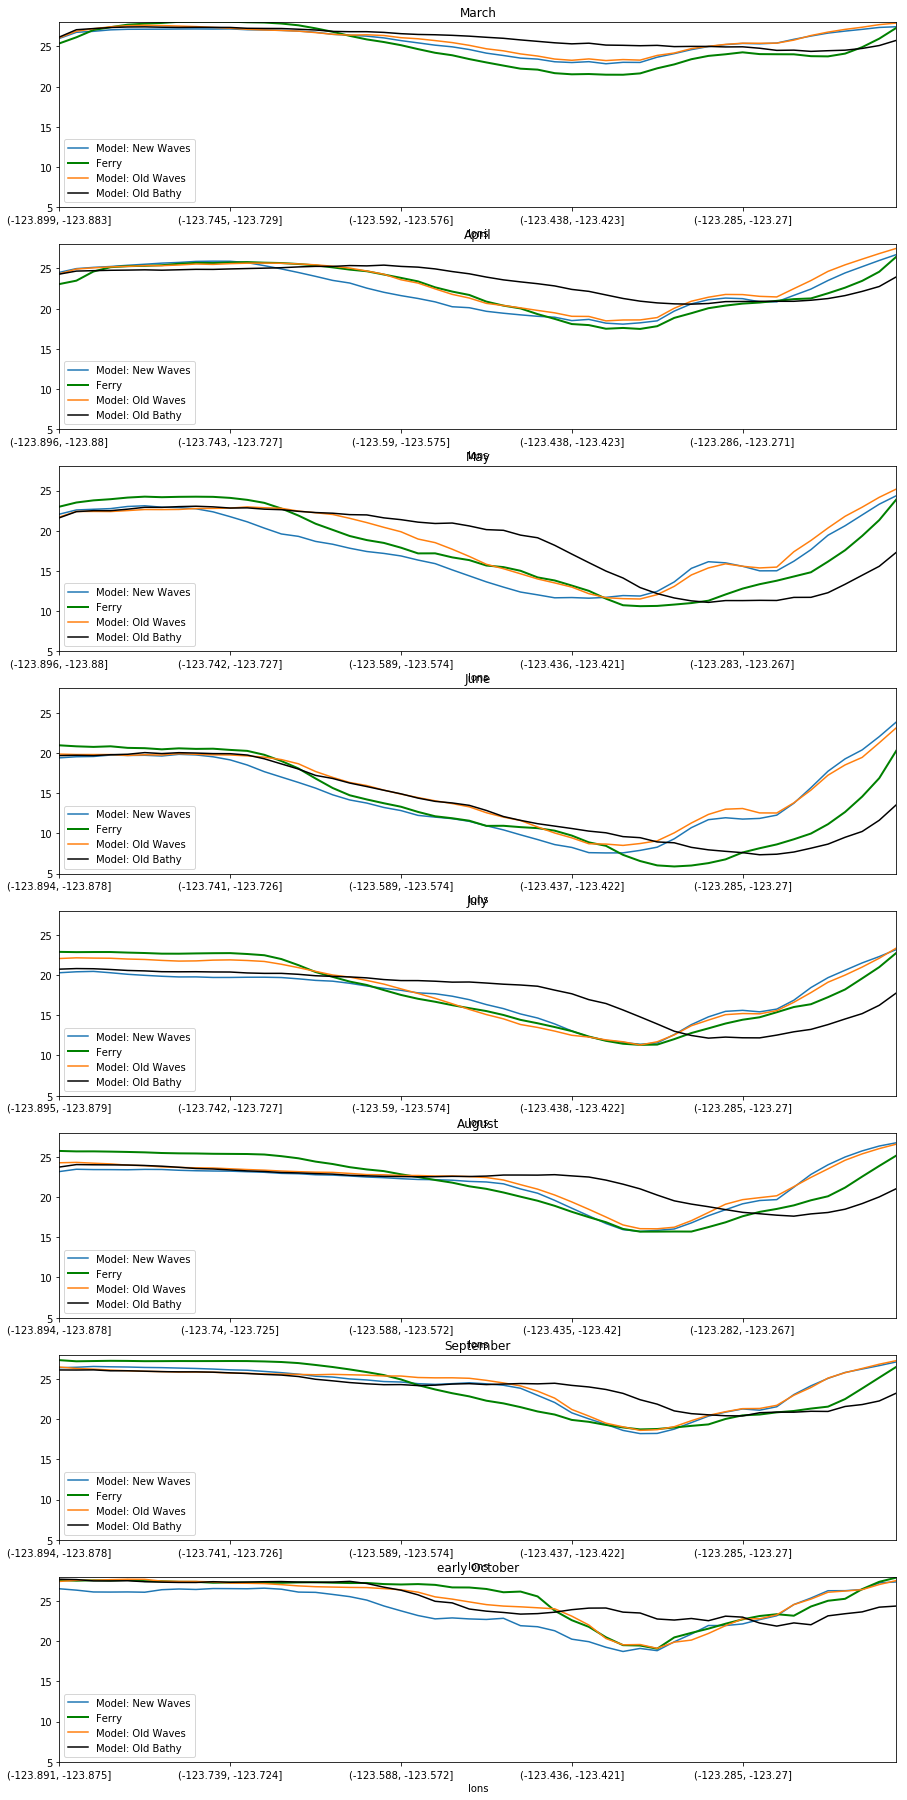

In [6]:
fig, axs = plt.subplots(8, 1, figsize=(15, 32))

new_waves_mar.model.plot(ax=axs[0], label='Model: New Waves')
v201803_mar.ferry.plot(ax=axs[0], color='g', label='Ferry', linewidth=2)
v201803_mar.model.plot(ax=axs[0], label='Model: Old Waves')
v201702_mar.model.plot(ax=axs[0], color='k', label='Model: Old Bathy')
axs[0].legend(loc='lower left')
axs[0].set_title('March')

new_waves_apr.model.plot(ax=axs[1], label='Model: New Waves')
v201803_apr.ferry.plot(ax=axs[1], color='g', label='Ferry', linewidth=2)
v201803_apr.model.plot(ax=axs[1], label='Model: Old Waves')
v201702_apr.model.plot(ax=axs[1], color='k', label='Model: Old Bathy')
axs[1].legend(loc='lower left')
axs[1].set_title('April')

new_waves_may.model.plot(ax=axs[2], label='Model: New Waves')
v201803_may.ferry.plot(ax=axs[2], color='g', label='Ferry', linewidth=2)
v201803_may.model.plot(ax=axs[2], label='Model: Old Waves')
v201702_may.model.plot(ax=axs[2], color='k', label='Model: Old Bathy')
axs[2].legend(loc='lower left')
axs[2].set_title('May');

new_waves_jun.model.plot(ax=axs[3], label='Model: New Waves')
v201803_jun.ferry.plot(ax=axs[3], color='g', label='Ferry', linewidth=2)
v201803_jun.model.plot(ax=axs[3], label='Model: Old Waves')
v201702_jun.model.plot(ax=axs[3], color='k', label='Model: Old Bathy')
axs[3].legend(loc='lower left')
axs[3].set_title('June');

new_waves_jul.model.plot(ax=axs[4], label='Model: New Waves')
v201803_jul.ferry.plot(ax=axs[4], color='g', label='Ferry', linewidth=2)
v201803_jul.model.plot(ax=axs[4], label='Model: Old Waves')
v201702_jul.model.plot(ax=axs[4], color='k', label='Model: Old Bathy')
axs[4].legend(loc='lower left')
axs[4].set_title('July');

new_waves_aug.model.plot(ax=axs[5], label='Model: New Waves')
v201803_aug.ferry.plot(ax=axs[5], color='g', label='Ferry', linewidth=2)
v201803_aug.model.plot(ax=axs[5], label='Model: Old Waves')
v201702_aug.model.plot(ax=axs[5], color='k', label='Model: Old Bathy')
axs[5].legend(loc='lower left')
axs[5].set_title('August');

new_waves_sep.model.plot(ax=axs[6], label='Model: New Waves')
v201803_sep.ferry.plot(ax=axs[6], color='g', label='Ferry', linewidth=2)
v201803_sep.model.plot(ax=axs[6], label='Model: Old Waves')
v201702_sep.model.plot(ax=axs[6], color='k', label='Model: Old Bathy')
axs[6].legend(loc='lower left')
axs[6].set_title('September');

new_waves_oct.model.plot(ax=axs[7], label='Model: New Waves')
v201803_oct.ferry.plot(ax=axs[7], color='g', label='Ferry', linewidth=2)
v201803_oct.model.plot(ax=axs[7], label='Model: Old Waves')
v201702_oct.model.plot(ax=axs[7], color='k', label='Model: Old Bathy')
axs[7].legend(loc='lower left')
axs[7].set_title('early October')

for ax in axs[0:8]:
    ax.set_ylim(5, 28)

# Calculate Statistics

In [7]:
def print_stats(newwaves):
    bias = -newwaves.ferry.mean() + newwaves.model.mean()
    print('bias =  ' + str(bias))
    RMSE = np.sqrt(np.sum((newwaves.model - newwaves.ferry)**2)
                              / newwaves.model.size)
    print('RMSE = ' + str(RMSE))
    xbar = newwaves.ferry.mean()
    Willmott = 1-(np.sum((newwaves.model - newwaves.ferry)**2)  / 
                             np.sum((np.abs(newwaves.model - xbar) 
                                     + np.abs(newwaves.ferry - xbar))**2))
    print('Willmott = ' + str(Willmott))
    return bias, RMSE, Willmott

In [8]:
def calc_stats(newwaves):
    bias = -newwaves.ferry.mean() + newwaves.model.mean()
    RMSE = np.sqrt(np.sum((newwaves.model - newwaves.ferry)**2)
                              / newwaves.model.size)
    xbar = newwaves.ferry.mean()
    Willmott = 1-(np.sum((newwaves.model - newwaves.ferry)**2)  / 
                             np.sum((np.abs(newwaves.model - xbar) 
                                     + np.abs(newwaves.ferry - xbar))**2))
    return bias, RMSE, Willmott

In [9]:
print_stats(v201702);

bias =  0.18190165933066282
RMSE = 4.93066940654
Willmott = 0.8429046818839723


In [10]:
print_stats(v201803);

bias =  0.5743458009027869
RMSE = 4.23186939884
Willmott = 0.8791958108145482


In [11]:
print_stats(newwaves);

bias =  0.0194194943194006
RMSE = 4.49365476811
Willmott = 0.8676765912952507


# Overall Mean

Looking for shifts

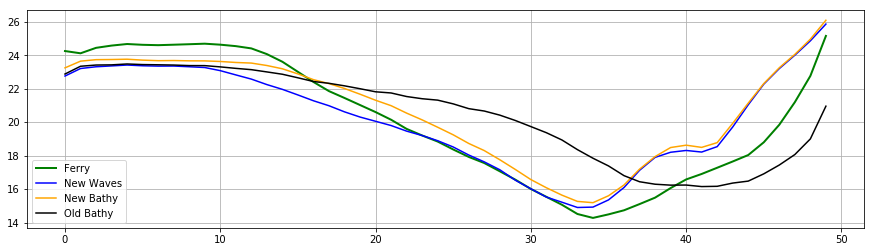

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(range(50), np.array(new_waves_binned.ferry.mean()), 'g', linewidth=2, label='Ferry')
shift = 0
ax.plot(range(shift, 50+shift), np.array(new_waves_binned.model.mean()), 'b', label='New Waves')
ax.plot(np.array(v201803_binned.model.mean()), 'orange', label='New Bathy')
ax.plot(np.array(v201702_binned.model.mean()), 'k', label='Old Bathy')
ax.legend(loc='lower left');
ax.grid();

In [13]:
base = 0.5*(new_waves_binned.ferry.mean()[10] + new_waves_binned.ferry.mean()[49])
base = new_waves_binned.ferry.mean()[10]
tsum = 0.
weight = 0.
for i in range(10, 50):
    tsum += i*(base-new_waves_binned.ferry.mean()[i])
    weight += (base-new_waves_binned.ferry.mean()[i])

base = 0.5*(new_waves_binned.model.mean()[10] + new_waves_binned.model.mean()[49])
base = new_waves_binned.model.mean()[10]

nsum = 0.
nweight = 0.
for i in range(10, 50):
    nsum += i*(base-new_waves_binned.model.mean()[i])
    nweight += (base-new_waves_binned.model.mean()[i])
    
base = 0.5*(v201803_binned.model.mean()[10] + v201803_binned.model.mean()[49])
base = v201803_binned.model.mean()[10]

bsum = 0.
bweight = 0.
for i in range(10, 50):
    bsum += i*(base-v201803_binned.model.mean()[i])
    bweight += (base-v201803_binned.model.mean()[i])
    
base = 0.5*(v201702_binned.model.mean()[10] + v201702_binned.model.mean()[49])
base = v201702_binned.model.mean()[10]

osum = 0.
oweight = 0.
for i in range(10, 50):
    osum += i*(base-v201702_binned.model.mean()[i])
    oweight += (base-v201702_binned.model.mean()[i])
print(tsum/weight, nsum/nweight, bsum/bweight, osum/oweight)
print(tsum/weight - nsum/nweight, tsum/weight - bsum/bweight, (tsum/weight - osum/oweight))
print (2/8.9*2.6, 1.4/2*8.9)
print (2/5.*2.6, 1/2*5)

32.748506658 30.1849334121 31.4589181357 36.4450561665
2.56357324586 1.28958852224 -3.69654950849
0.5842696629213483 6.2299999999999995
1.04 2.5


So this would suggest that going from 0 m, to 2 m gives a shift of 8.9 units (50 bins) and the waves shifts it a further 1.  So 2.6 units = 2 m/8.9 units * 2.6 units = 0.6 m back, or a depth of 1.4 m.  
1.4 m/ 2m * 8.9 + 1 = 6.2 + 1 = 7.2

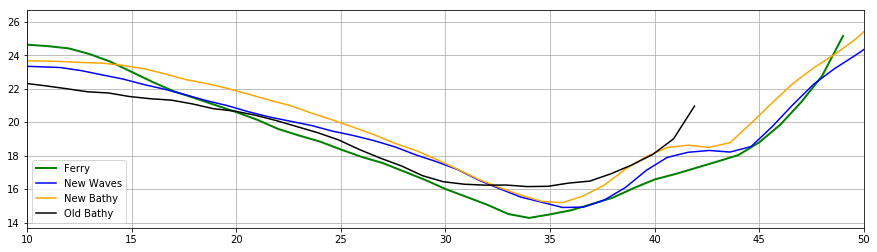

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(range(50), np.array(new_waves_binned.ferry.mean()), 'g', linewidth=2, label='Ferry')
shift = 2.6
ax.plot(np.arange(shift, 50+shift), np.array(new_waves_binned.model.mean()), 'b', label='New Waves')
shift = 1.6
ax.plot(np.arange(shift, 50+shift), np.array(v201803_binned.model.mean()), 'orange', label='New Bathy')
shift = -7.1
ax.plot(np.arange(shift, 50+shift), np.array(v201702_binned.model.mean()), 'k', label='Old Bathy')
ax.legend(loc='lower left');
ax.set_xlim((10, 50))
ax.grid();

So with base on left only, would suggest that going from 0 m, to 2 m gives a shift of 5 units (50 bins) and the waves shifts it a further 1.3. So 2.6 units = 2 m/5 units 2.6 units = 1.0 m back, or a depth of 1.0 m.
1.0 m/ 2m 5 + 1.3 = 2.5 + 1.3 = 3.8

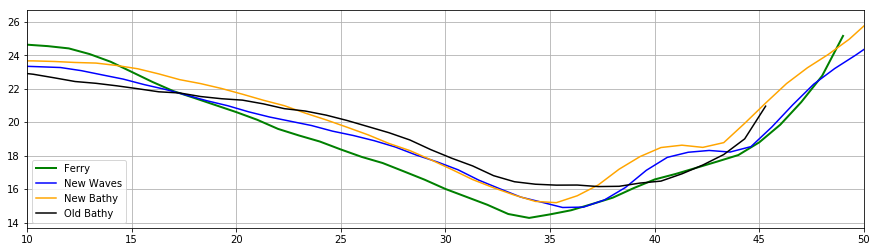

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(range(50), np.array(new_waves_binned.ferry.mean()), 'g', linewidth=2, label='Ferry')
shift = 2.6
ax.plot(np.arange(shift, 50+shift), np.array(new_waves_binned.model.mean()), 'b', label='New Waves')
shift = 1.3
ax.plot(np.arange(shift, 50+shift), np.array(v201803_binned.model.mean()), 'orange', label='New Bathy')
shift = -3.7
ax.plot(np.arange(shift, 50+shift), np.array(v201702_binned.model.mean()), 'k', label='Old Bathy')
ax.legend(loc='lower left');
ax.set_xlim((10, 50))
ax.grid();

## Look at Half Widths

this is the one that best correlates what I see by eye.

In [16]:
base = new_waves_binned.ferry.mean()[10]
minferry = np.min(new_waves_binned.ferry.mean())
half = 0.5*(minferry + base)
print(half)
#print(new_waves_binned.ferry.mean()[22])
#print(new_waves_binned.ferry.mean()[45:47])
print(0.5*(45.5+22))

19.451850862
33.75


In [17]:
base = new_waves_binned.model.mean()[10]
minnew = np.min(new_waves_binned.model.mean())
half = 0.5*(minnew + base)
print(half)
print(new_waves_binned.model.mean()[23:25])
print(new_waves_binned.model.mean()[42:44])
print(0.5*(42.5+23.5))
print(0.5*(42.5+23.5) - 33.75)

18.9871416379
lons
(-123.544, -123.529]    19.199404
(-123.529, -123.514]    18.888667
Name: model, dtype: float64
lons
(-123.252, -123.237]    18.535298
(-123.237, -123.222]    19.710956
Name: model, dtype: float64
33.0
-0.75


In [18]:
base = v201803_binned.model.mean()[10]
minv201803 = np.min(v201803_binned.model.mean())
half = 0.5*(minv201803 + base)
print(half)
print(v201803_binned.model.mean()[24:26])
print(v201803_binned.model.mean()[42:44])
print(0.5*(42.5+24.5))
print(0.5*(42.5+24.5) - 33.75)

19.4050745958
lons
(-123.529, -123.514]    19.693785
(-123.514, -123.498]    19.241385
Name: model, dtype: float64
lons
(-123.252, -123.237]    18.774805
(-123.237, -123.222]    19.927257
Name: model, dtype: float64
33.5
-0.25


In [19]:
base = v201702_binned.model.mean()[10]
minv201702 = np.min(v201702_binned.model.mean())
half = 0.5*(minv201702 + base)
print(half)
print(v201702_binned.model.mean()[30])
print(v201702_binned.model.mean()[48:50])
print(0.5*(48.5+30))
print(0.5*(48.5+30) - 33.75)

19.7246122868
19.733191298
lons
(-123.16, -123.145]    18.998562
(-123.145, -123.13]    20.952808
Name: model, dtype: float64
39.25
5.5


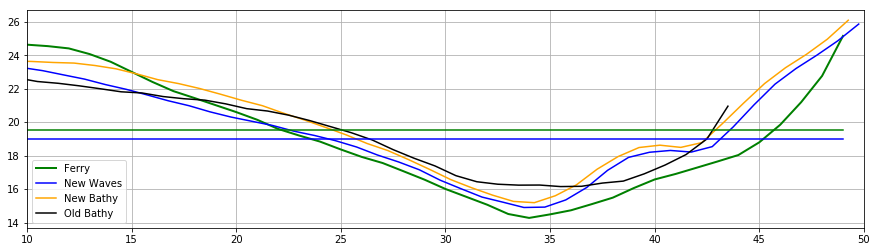

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(range(50), np.array(new_waves_binned.ferry.mean()), 'g', linewidth=2, label='Ferry')
shift = 0.75
ax.plot(np.arange(shift, 50+shift), np.array(new_waves_binned.model.mean()), 'b', label='New Waves')
shift = 0.25
ax.plot(np.arange(shift, 50+shift), np.array(v201803_binned.model.mean()), 'orange', label='New Bathy')
shift = -5.5
ax.plot(np.arange(shift, 50+shift), np.array(v201702_binned.model.mean()), 'k', label='Old Bathy')
ax.legend(loc='lower left');
ax.set_xlim((10, 50))
ax.grid();
ax.plot(range(10, 50), 19.5*np.ones((40)), 'g')
ax.plot(range(10, 50), 19*np.ones((40)), 'b')

In [21]:
print (2/5.75*0.75, 1.74/2*5.75+ 0.5)

0.2608695652173913 5.5025


So based on half width, would suggest that going from 0 m, to 2 m gives a shift of 5.75 units (50 bins) and the waves shifts it a further 0.5. So 0.75 units = 2 m/5.75 units 0.75 units = 0.26 m back, or a depth of 1.74 m.
1.74 m/ 2m 5.75 + 0.5 = 5 + 0.5 = 6.5

# Month by Month Statistics

In [22]:
def find_stats(new_waves_binned):
    new_bias = np.zeros(50)
    new_RMSE = np.zeros_like(new_bias)
    new_Willmott = np.zeros_like(new_bias)
    for i, group in enumerate(new_waves_binned):
        new_bias[i], new_RMSE[i], new_Willmott[i] = calc_stats(group[1])
    return new_bias, new_RMSE, new_Willmott

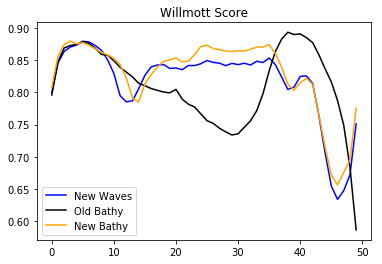

In [23]:
new_bias, new_RMSE, new_Willmott = find_stats(new_waves_binned)
plt.plot(new_Willmott, 'b', label='New Waves')
v201702_bias, v201702_RMSE, v201702_Willmott = find_stats(v201702_binned)
plt.plot(v201702_Willmott, 'k', label='Old Bathy')
v201803_bias, v201803_RMSE, v201803_Willmott = find_stats(v201803_binned)
plt.plot(v201803_Willmott, 'orange', label='New Bathy')
plt.legend(loc='lower left')
plt.title('Willmott Score');

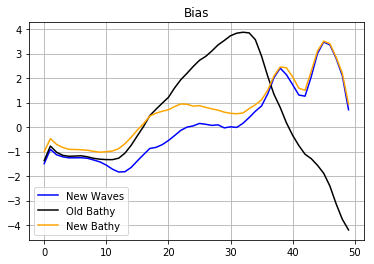

In [24]:
plt.plot(new_bias, 'b', label='New Waves')
plt.plot(v201702_bias, 'k', label='Old Bathy')
plt.plot(v201803_bias, 'orange', label='New Bathy')
plt.legend(loc='lower left')
plt.grid()
plt.title('Bias');

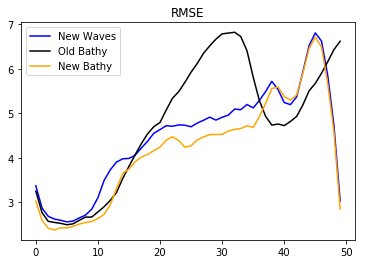

In [25]:
plt.plot(new_RMSE, 'b', label='New Waves')
plt.plot(v201702_RMSE, 'k', label='Old Bathy')
plt.plot(v201803_RMSE, 'orange', label='New Bathy')
plt.legend(loc='upper left')
plt.title('RMSE');

# Map Comparison Plots

In [26]:
istart, iend = 280, 500
jstart, jend = 200, 380
di = iend - istart
dj = jend - jstart

In [27]:
meshfile = nc.Dataset('/Users/sallen/Documents/MEOPAR/sea_initial/mesh_mask201803b.nc')
tmask = 1-meshfile.variables['tmask'][0, 0, istart:iend, jstart:jend]
mbathy = meshfile.variables['mbathy'][0, istart:iend, jstart:jend]
gdepw = meshfile.variables['gdepw_0'][0, :, istart:iend, jstart:jend]

# calculate bathymetry based on meshmask
NEMO_bathy = np.zeros(mbathy.shape)
for i in range(NEMO_bathy.shape[1]):
    for j in range(NEMO_bathy.shape[0]):
        level = mbathy[j,i]
        NEMO_bathy[j,i] = gdepw[level,j,i]
NEMO_bathy = np.ma.masked_array(NEMO_bathy, mask = tmask)


meshfile.close()
salfile = nc.Dataset('/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc')
lats = salfile.variables['nav_lat'][istart:iend, jstart:jend]
lons = salfile.variables['nav_lon'][istart:iend, jstart:jend]
salfile.close()

In [28]:
depth = 0
salinity = np.ma.zeros((6, 3, di, dj))
for m, filename in enumerate(['mean_T_06apr17.nc', 'mean_T_06may17.nc', 'mean_T_05jun17.nc', 
                              'mean_T_05jul17.nc', 'mean_T_04aug17.nc', 'mean_T_03sep17.nc']):
    oldbathy = nc.Dataset('/Users/sallen/Documents/MeoPar/Results/oldbathy/'+filename)
    salinity[m, 0] = np.ma.masked_array(oldbathy['vosaline'][0, depth, istart:iend, jstart:jend], mask=tmask)
    newbathy = nc.Dataset('/Users/sallen/Documents/MeoPar/Results/test_this_bathy/'+filename)
    salinity[m, 1] = np.ma.masked_array(newbathy['vosaline'][0, depth, istart:iend, jstart:jend], mask=tmask)
    new_waves = nc.Dataset('/Users/sallen/Documents/MeoPar/Results/new_waves/'+filename)
    salinity[m, 2] = np.ma.masked_array(new_waves['vosaline'][0, depth, istart:iend, jstart:jend], mask=tmask)
    oldbathy.close()
    newbathy.close()
    new_waves.close()

In [29]:
cmap = cm.haline
cmap.set_bad('darkgreen')
cmap2 = cm.balance
cmap2.set_bad(color='black')
vmin, vmax = 10, 28

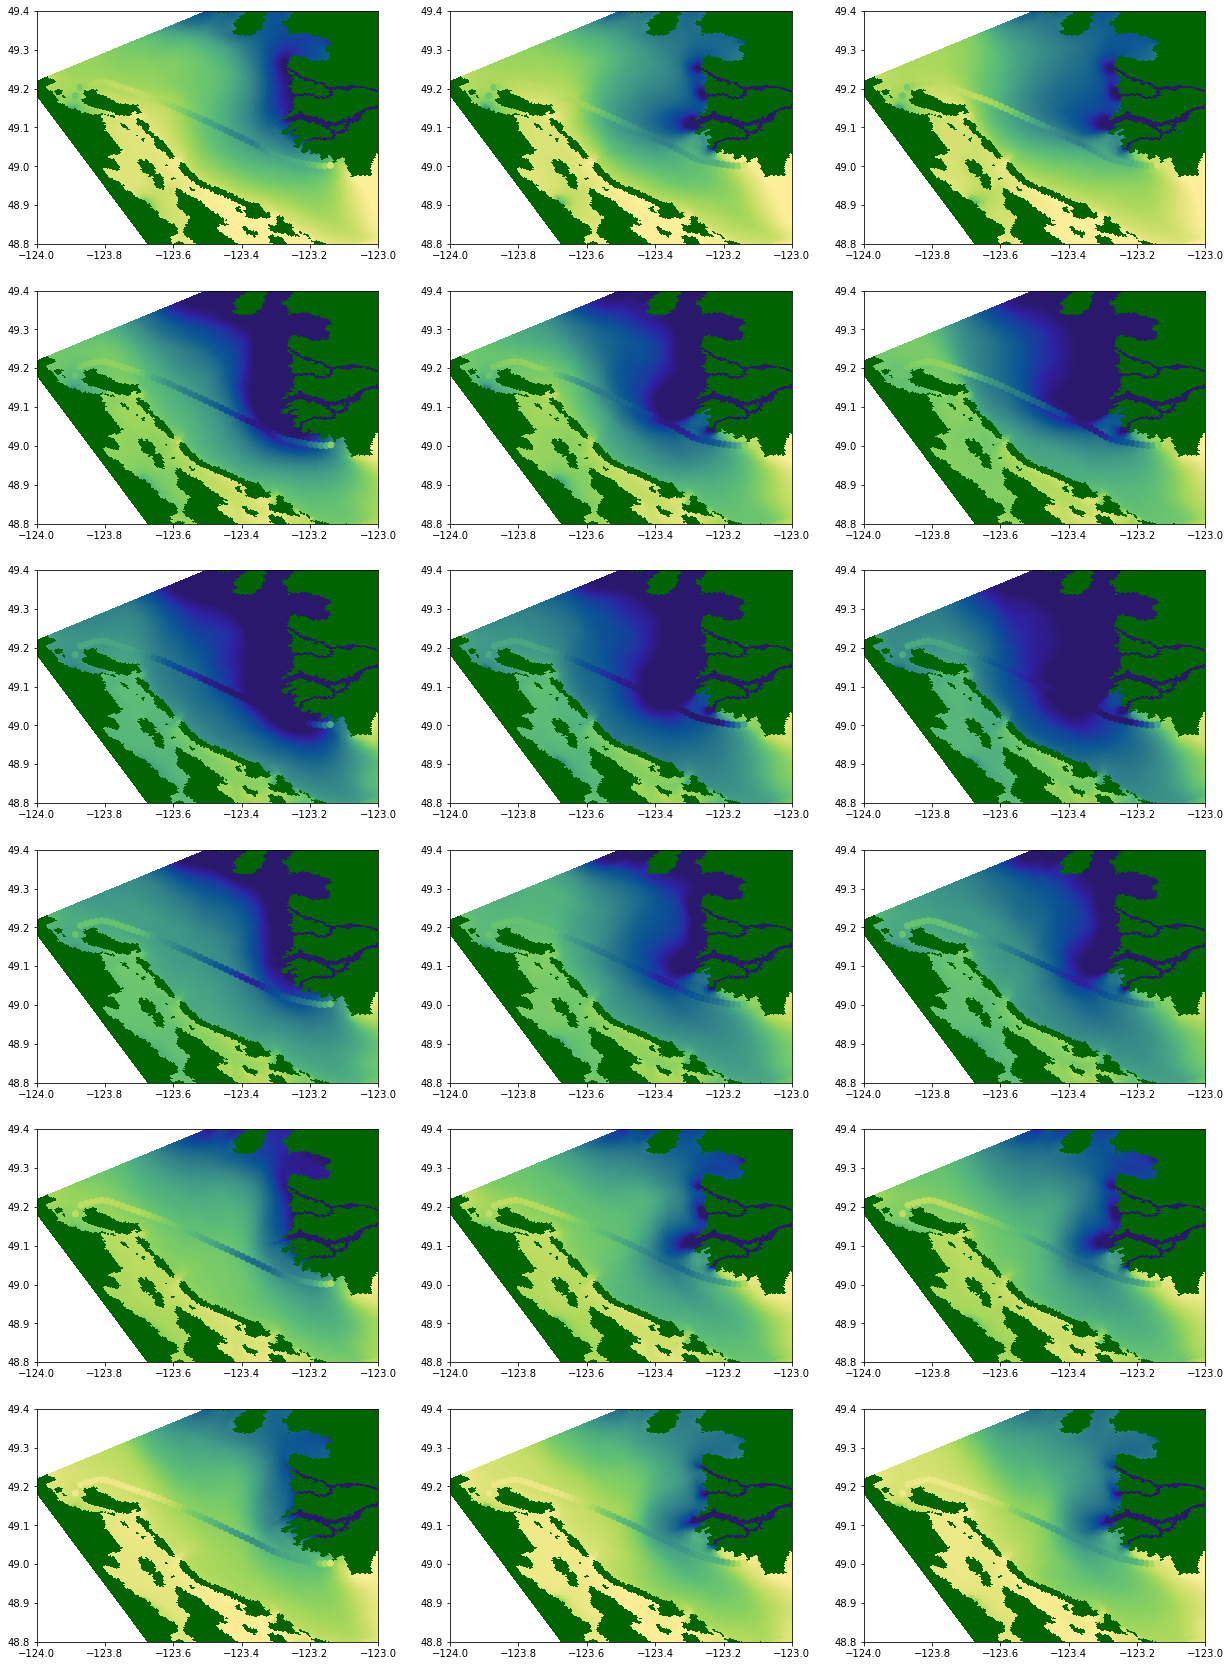

In [30]:
fig, axs = plt.subplots(6, 3, figsize=(21, 30))
for m in range(6):
    for i in range(3):
        mesh = axs[m, i].pcolormesh(lons, lats, salinity[m, i], vmax=vmax, vmin=vmin, cmap=cmap)
        viz_tools.set_aspect(axs[m, i], coords='map')
        axs[m, i].set_ylim((48.8, 49.4))
        axs[m, i].set_xlim((-124, -123))
#    fig.colorbar(mesh, ax=axs[i])
for i in range(3):
    axs[0, i].scatter(new_waves_apr.lons, new_waves_apr.lats, c=new_waves_apr.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1, i].scatter(new_waves_may.lons, new_waves_may.lats, c=new_waves_may.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[2, i].scatter(new_waves_jun.lons, new_waves_jun.lats, c=new_waves_jun.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[3, i].scatter(new_waves_jul.lons, new_waves_jul.lats, c=new_waves_jul.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[4, i].scatter(new_waves_aug.lons, new_waves_aug.lats, c=new_waves_aug.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[5, i].scatter(new_waves_sep.lons, new_waves_sep.lats, c=new_waves_sep.ferry, cmap=cmap, vmax=vmax, vmin=vmin)
#axs[0, 0].text(5, 10, 'April')
#axs[1, 0].text(5, 10, 'May')
#axs[2, 0].text(5, 10, 'June')
#axs[3, 0].text(5, 10, 'July')
#axs[4, 0].text(5, 10, 'August')
#axs[5, 0].text(5, 10, 'September');

# Over all Mean as a Map (New Waves, New Bathymetry)

In [32]:
mean_salinity = np.mean(salinity, axis=0)

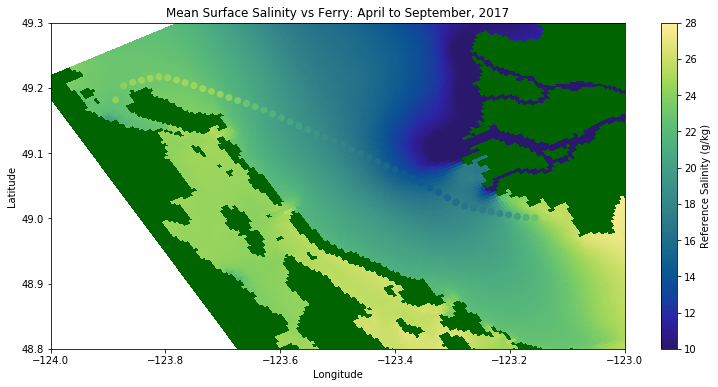

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
mesh = ax.pcolormesh(lons, lats, mean_salinity[2], vmax=vmax, vmin=vmin, cmap=cmap)
viz_tools.set_aspect(ax, coords='map')
cb = fig.colorbar(mesh, ax=ax)
ax.scatter(new_waves_apr.lons, new_waves_apr.lats, c=new_waves_binned.ferry.mean(), cmap=cmap, vmax=vmax, vmin=vmin)
ax.set_xlim((-124, -123))
ax.set_ylim((48.8, 49.3))
ax.set_title('Mean Surface Salinity vs Ferry: April to September, 2017')
cb.set_label('Reference Salinity (g/kg)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Better match at 0.5 m than at 1.5 m.  (Fixed error with shift in months!)

Note enough freshwater near the coast to the south of the river in the new bathymetry but otherwise not bad.

However, out of the plume, near Nanaimo, at this time the model is too fresh.

* Is Ferry salinity units PSU or reference salinity?  Reference salinity
* Rerun the ferry/model analysis at 0.5 m instead of 1 m.  Very nice at 0.5 m, matches well.
* Check the Fraser River flow  Done its fine.
* See how different the tides are
* Get the correct meshmask done

* why the 1 m shift? Does this make sense?

* run the new waves case against the citizen science data